# Housing Data: King County, WA 

### *Modeling data to House Price*

###### Authors: [Svitlana Glibova](mailto:s.glibova@gmail.com) & [Jamie Dowat](mailto:jamie_dowat44@yahoo.com)

![seattleskyline](img/seattleskyline.png)

## Business Understanding

#### Real Estate and Data Science

As the world becomes more technologically savvy, highly competitive markets (such as real estate) are reaching for more and more rigorous analytics to help them stay ahead. This desire for more accurate predictive and inferential modeling is so great, apparently, that they are offering formal Data Science [bootcamps](https://www.propertyquants.com/training/?utm_source=google&utm_medium=cpc&utm_campaign=P-Real%20Estate%20Data&utm_term=%2Breal%20%2Bestate%20%2Bdata&utm_content=&gclid=Cj0KCQiAvbiBBhD-ARIsAGM48bzsFBf1tarC8f6xwnH9T-HkmdpI_qLjozgbvPXSHuCIemsH85A9eSoaAooVEALw_wcB) that specialize in measuring real estate trends!

Companies like [Opendoor](https://www.youtube.com/watch?v=dR5N8cMkIGQ) and Zillow are also taking the industry in a different direction, by working to automate the home-buying and selling process, which requires proper analysis of market trends to determine a house's estimated market value.

#### Defining the Stakeholder: **Residential Realtors**

Though there are a number of stakeholders in the industry, from investors to house flippers to renters, we decided to gear our analysis towards maximizing profit for **residential realtors**, whose paycheck directly depends on the price of the house they sell.

In other words, this analysis seeks to answer the question:
###### How can you best assist your client in setting or offering a home price?
###### (Is a given client undercharging or overpaying for a home?)

Through a more comprehensive knowledge of house price trends, King County realtors can (hopefully) see more success when helping to set house prices for their clients.

#### A Quick Preview of Our Results:

Overall, we found that the following variables had the strongest positive correlation with house prices:
* House size
* House Grade
* Location 
* Size of neighboring houses
* House condition
* Whether or not the house has a waterfront view


### "A COVID Caveat"

It is important to note that our data only consists of homes that were sold between 2014-2015. Considering the current economic situation, we cannot say that our resulting models account for these current trends. For a more detailed account of how house prices have been changing in 2020-2021, take a look at our **presentation.pdf** file.

## Data Exploration 

This data consists of information for **21,597 homes** within King County, WA. 

The data was sourced from the [King County website](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

Let's take a look:

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('src/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

###### Let's take care of our NaN values

In [5]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# Sqft basement has some unknown values we need to deal with as well:

data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
225.0         1
2250.0        1
1770.0        1
2310.0        1
2180.0        1
Name: sqft_basement, Length: 304, dtype: int64

For the sake of analysis, we didn't find any use with the **yr_renovated**, and **view** columns. We'll drop that along with **id**. 

In [7]:
from src import boring_code as bc

In [8]:
nan_columns = ['waterfront', 'sqft_basement']
cols_to_drop = ['view', 'yr_renovated', 'id']

In [9]:
bc.cleaning(df=data, 
         column_names=nan_columns, 
         drop=cols_to_drop, 
         date_col='date', 
         date_suffix=['_sold', '_sold'], 
         date_split='/')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2,2015


In [10]:
data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

*33 bedrooms?* When we plugged this house's parcel id (2402100895) into the [King County House Finder](https://info.kingcounty.gov/assessor/eMap/default.aspx), we concluded it must be an input error. We decided to replace this bedroom value with **np.nan**:

In [11]:
data['bedrooms'].iloc[15856] = np.nan

##### Adding New Features
Here's the list of the new features we added to the data frame:

* **price_per_sqft**
* **yard_size** = sqft_lot - sqft_above - sqft_basement
* **in_city** - Y or N, if the house is located in a Seattle zipcode
* **unincorporated** - if the house is located in an incorporated area (for map of unincorporated/inc areas in KC, see Sources at the bottom of this notebook)
* **zip_psqft** - the average price per sqft for the given house's zipcode
* **price_per_lot_sqft**
* **location_cost** - categorical that identifies the zip-per-sqft range the house's zipcode has
* **decade_built**
* **40yr_section** - if the house was built between 1900-1940, 1940-1980, or 1980-2020
* **waterfront** - change 0s and 1s to Y or N
* **season sold**
* **6plusbathrooms** - 'Y' if the house has 6 or more bathrooms.
* **3plusbathrooms** - 'Y' if the house has 3 or more bathrooms.

We wanted to see if our model would be improved by grouping our categorical variables in different ways.

In [12]:
bc.new_features(df=data, 
                new_column_names=['price_per_sqft', 'yard_size', 'in_city', 'unincorporated',
                                 'zip_psqft', 'price_per_lot_sqft', 'location_cost', 'decade_built',
                                 '40yr_section', 'waterfront', 'season_sold', '6plusbathrooms', '3plusbathrooms'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,in_city,unincorporated,zip_psqft,location_cost,price_per_lot_sqft,decade_built,40yr_section,season_sold,6plusbathrooms,3plusbathrooms
0,221900.0,3.0,1.00,1180,5650,1.0,NaN,3,7,1180,...,Y,N,189.172528,zpsft100_200,39.274336,1950_1960,1900_1940,fall,N,N
1,538000.0,3.0,2.25,2570,7242,2.0,N,3,7,2170,...,Y,N,282.680191,zpsft200_300,74.288870,1950_1960,1900_1940,winter,N,N
2,180000.0,2.0,1.00,770,10000,1.0,N,3,6,770,...,N,N,225.145368,zpsft200_300,18.000000,1930_1940,1900_1940,winter,N,N
3,604000.0,4.0,3.00,1960,5000,1.0,N,5,7,1050,...,Y,N,337.245108,zpsft300_400,120.800000,1960_1970,1900_1940,winter,N,Y
4,510000.0,3.0,2.00,1680,8080,1.0,N,3,8,1680,...,N,N,265.686627,zpsft200_300,63.118812,1980_1990,1900_1940,winter,N,N


### Looking at Correlations

In [13]:
# dropping these columns temporarily for our visualizations... don't worry, we'll we using them later ;)
cols = data.drop(labels=['zipcode', 'lat', 'long'], axis=1).columns
corr_df = data[cols].corr()

In [14]:
corr_table = bc.corr_table(corr_df)
corr_table.head()

,cc
pairs,
"(yard_size, sqft_lot)",0.999711
"(year_sold, month_sold)",0.971193
"(sqft_living15, sqft_living)",0.943227
"(sqft_lot, sqft_lot15)",0.943193
"(yard_size, sqft_lot15)",0.942230


We'll bring back this table again when we start dealing with multicollinearity. For now, let's find the variables that have the highest correlation with **price**:

In [15]:
corr_df['price'][corr_df['price'] > .5].sort_values(ascending=False)

price             1.000000
sqft_living       0.701917
grade             0.667951
sqft_above        0.605368
sqft_living15     0.585241
price_per_sqft    0.556056
zip_psqft         0.532667
bathrooms         0.525906
Name: price, dtype: float64

Let's explore these higher correlated variables (and some others) with some ***visualizations***...

### Visualizing the Data

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

###### First, let's get a sense of how these house prices are distributed:

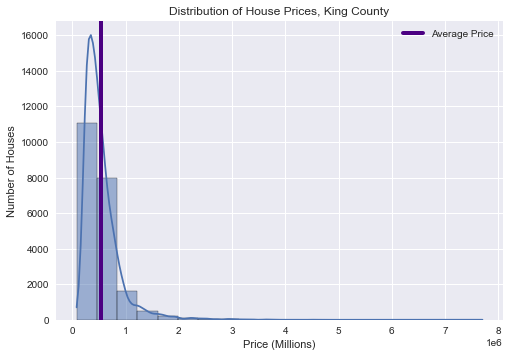

In [17]:
bc.price_distribution(data)

Look's like we have a significant right **(positive) skew**.

In [18]:
# Average Price
data.price.mean()

540296.5735055795

###### Let's see how price differs by **House Grade**. Houses in King County are graded by this criteria:
* 1-3:  Falls short of minimum building standards. Normally cabin or inferior structure.
* 4: Generally older, low quality construction. Does not meet code.
* 5: Low construction costs and workmanship. Small, simple design.
* 6: Lowest grade currently meeting building code. Low quality materials and simple designs.
* 7: Average grade of construction and design. Commonly seen in plats and older sub-divisions.
* 8: Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
* 9: Better architectural design with extra interior and exterior design and quality.
* 10: Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
* 11: Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
* 12: Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
* 13: Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.


<AxesSubplot:title={'center':'Comparing House Grade to Price'}, xlabel='Grade - King County Grading System (See Appendix)', ylabel='Price (Millions)'>

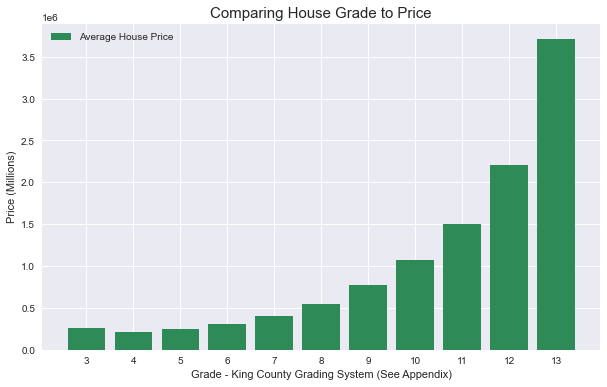

In [19]:
bc.price_by_grade(data)

There seems to be a significant positive correlation here, with an **exponential** shape.

###### Let's see if the **size** of the house correlates with house price:

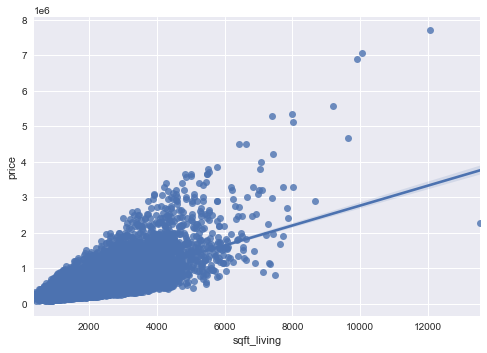

In [20]:
bc.sqft_living_vs_price(data)

Looks like we have a definite positive correlation here, and there doesn't seem to be any exponential shaping. This should be a good candidate for our model.

###### Now, what about waterfront homes? Do they typically price higher?

<AxesSubplot:title={'center':'Waterfront or No Waterfront Property? Comparing Price Per Sqft Distribution'}, xlabel='Price per Square Foot', ylabel='Density'>

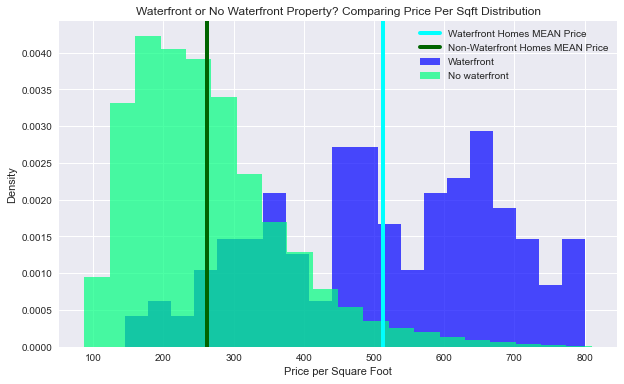

In [21]:
bc.waterfront_price_dist(data)

###### Let's also get a sense of the distribution of YEAR BUILT:

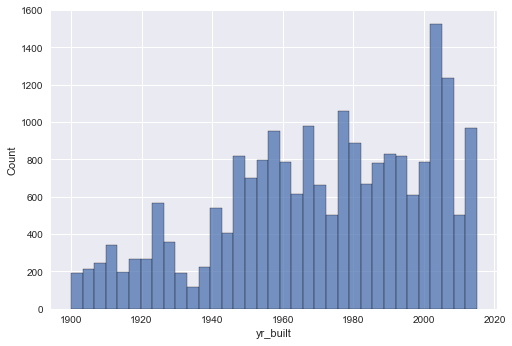

In [22]:
bc.yr_built_dist(data)

###### ...And Average Price per Sqft per Zipcode

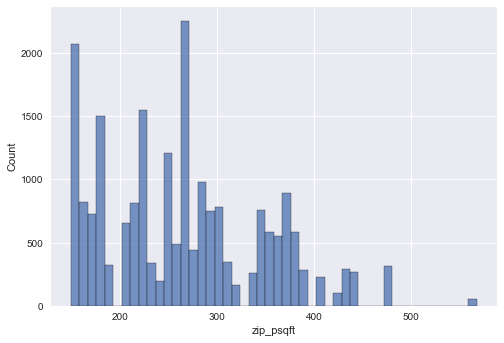

In [23]:
bc.zip_price_per_sqft_dist(data)

###### What about LOCATION? 

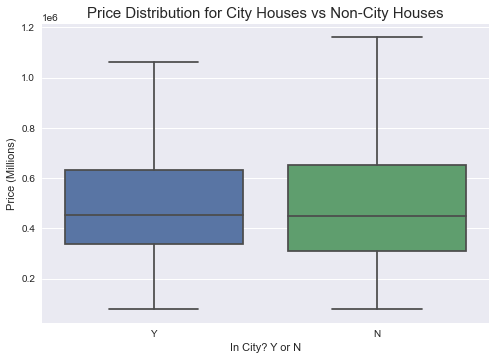

In [24]:
# In city vs Out of City Price Distributions
bc.in_city_boxplots(data)

These boxplots were surprising-- we were definitely expecting city homes to be priced higher on average.

When we looked at the King County Map (which is located at the bottom of this notebook), we wanted to see if incorporated homes (homes within a municipality) had less "bang for buck" than unincorporated homes.

Click [here](https://www.starnewsonline.com/article/NC/20151017/news/605047421/WM) to read an interesting article that expains the pros and cons of incorporated/unincorporated residencies.

<AxesSubplot:title={'center':'Comparing Average Price per Sqft: Unincorporated vs Incorporated Houses'}, ylabel='Average Price per Sqft'>

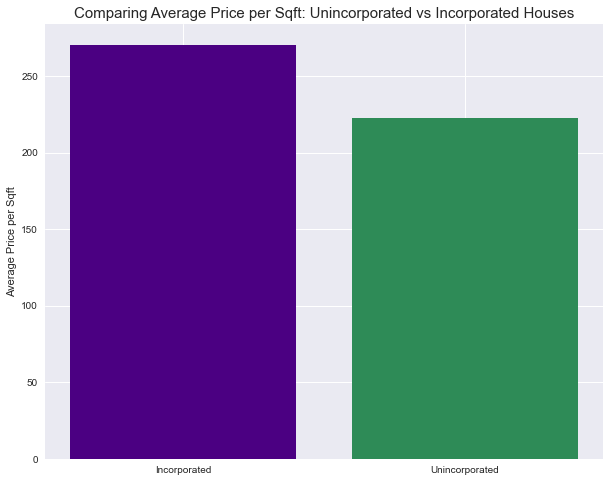

In [25]:
bc.incorp_vs_unincorp(data)

This bar graph highlights a pretty significance between the two. 

To see if the difference between the two was statistically significant, we performed **Welch's t-test**:

*Null Hypothesis: *
>$H_{0}$: The mean difference between incorporated and unincorporated price per sqft is zero. i.e. $\mu_{0} = \mu_{1}$

*Alternative Hypothesis*
>$H_{1}$ (1-tailed): The mean difference between incorporated and unincorporated price per sqft is **greater than** zero.

$\alpha$ = 0.05

First, we verified that the two distributions were relatively normal:

<AxesSubplot:title={'center':'Distribution of Price per Sqft: Incorporated vs Unincorporated Homes'}, xlabel='Price per Sqft', ylabel='Density'>

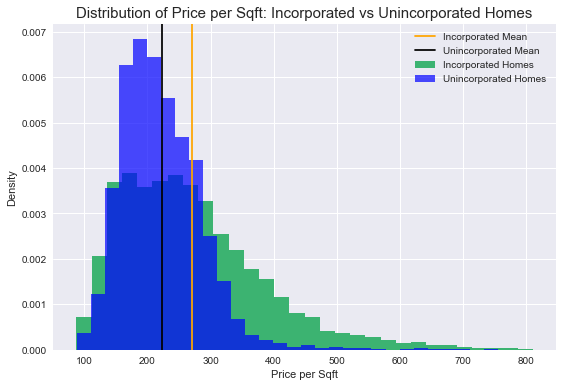

In [26]:
bc.ttest_dist_check(data)

There is a definite positive skew, but not enough to not be eligible for a t-test.

In [27]:
from scipy import stats

The variances of the two distributions are relatively similar:

In [28]:
data['price_per_sqft'][data['unincorporated']=='N'].describe()

count    18714.000000
mean       270.539063
std        114.013676
min         87.588235
25%        183.877554
50%        251.258393
75%        330.243325
max        810.138889
Name: price_per_sqft, dtype: float64

In [29]:
data['price_per_sqft'][data['unincorporated']=='Y'].describe()

count    2883.000000
mean      222.627922
std        65.395154
min        88.000000
25%       176.395939
50%       213.268608
75%       259.870130
max       754.716981
Name: price_per_sqft, dtype: float64

Let's get our p_value. Since `scipy.stats.ttest_ind()` only does a two-tailed test, we have to divide this value by 2.

In [30]:
alpha = 0.05

p_val = stats.ttest_ind(data['price_per_sqft'][data['unincorporated']=='N'], data['price_per_sqft'][data['unincorporated']=='Y']).pvalue / 2
p_val

1.6240521003735314e-106

In [31]:
p_val < alpha

True

*Given that the p_value is less than alpha, we can confirm that the mean price per sqft of Incorporated homes is not greater than the mean price per sqft of Unincorporated homes by chance*.

### Let's do some mappin'!

Click [here](https://www.kingcounty.gov/services/gis/GISData.aspx) to access the King County shapefile website.

In [32]:
import geopandas as gpd

Below is a cloropleth map depicting the Average Price per Square Foot for each zipcode (outlined in the map).

Main takeaway: the zipcodes with the **lowest price per sqft** are concentrated on the **south** half of the map.

<AxesSubplot:title={'center':'Price per Square Foot per Zipcode'}>

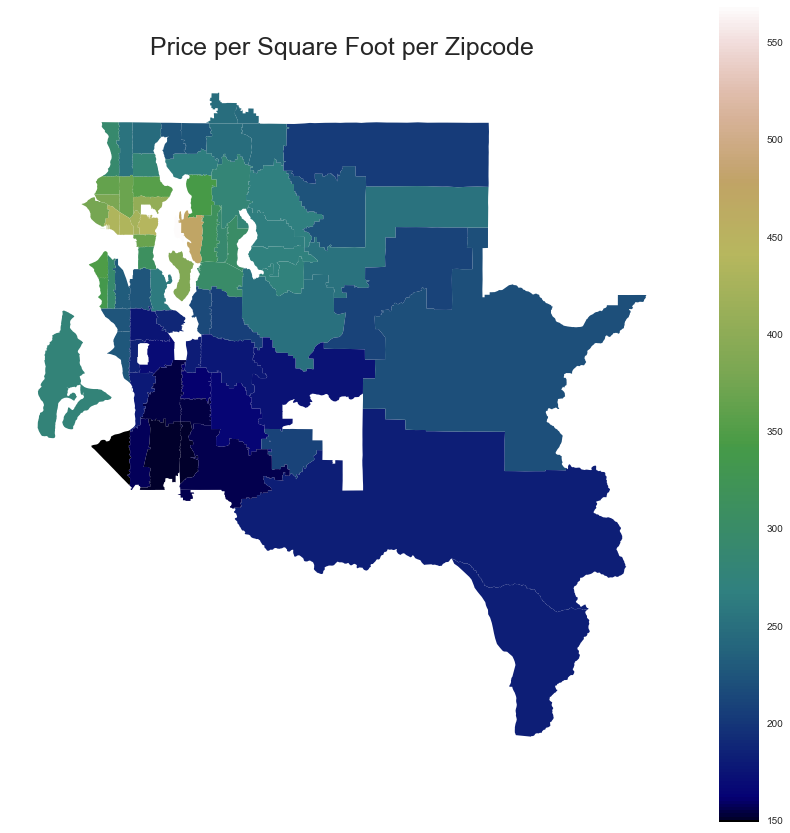

In [33]:
bc.cloropleth(data)

To see the map distribution of different qualities of houses, we layered on **grade** to the cloropleth map:

We found that there was a **higher concentration of higher quality houses on the northern half of the map**.

<AxesSubplot:title={'center':'Distribution of Homes Using the King County Grading System'}>

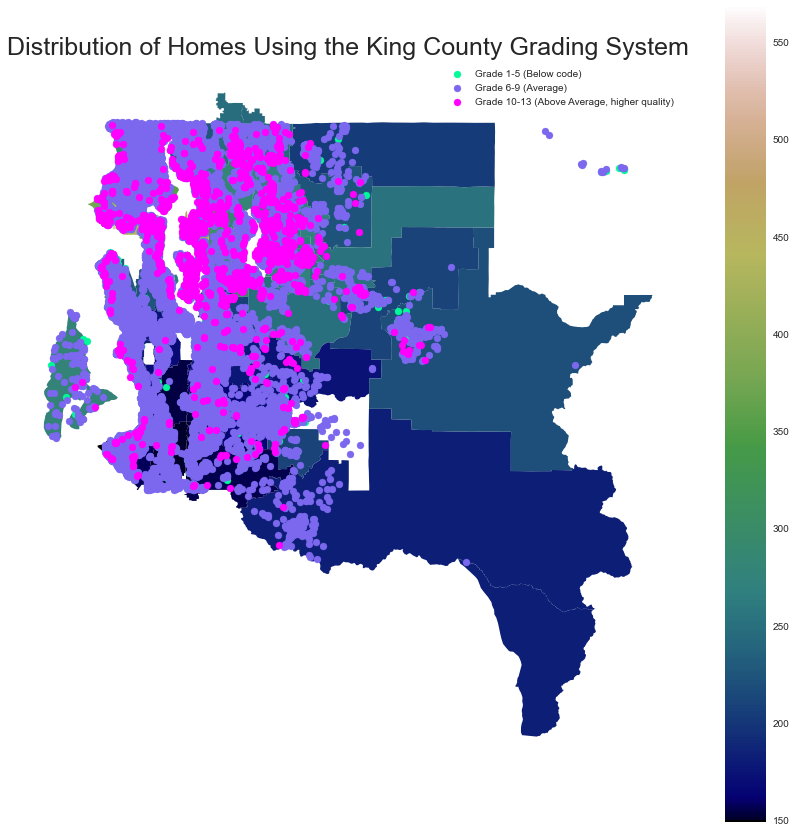

In [34]:
bc.map_grades(data)

We also wanted to see if there was any notable patterns with **waterfront homes** in terms of house quality.

There are no patterns of note.

<AxesSubplot:title={'center':'Price per Square Foot per Zipcode'}>

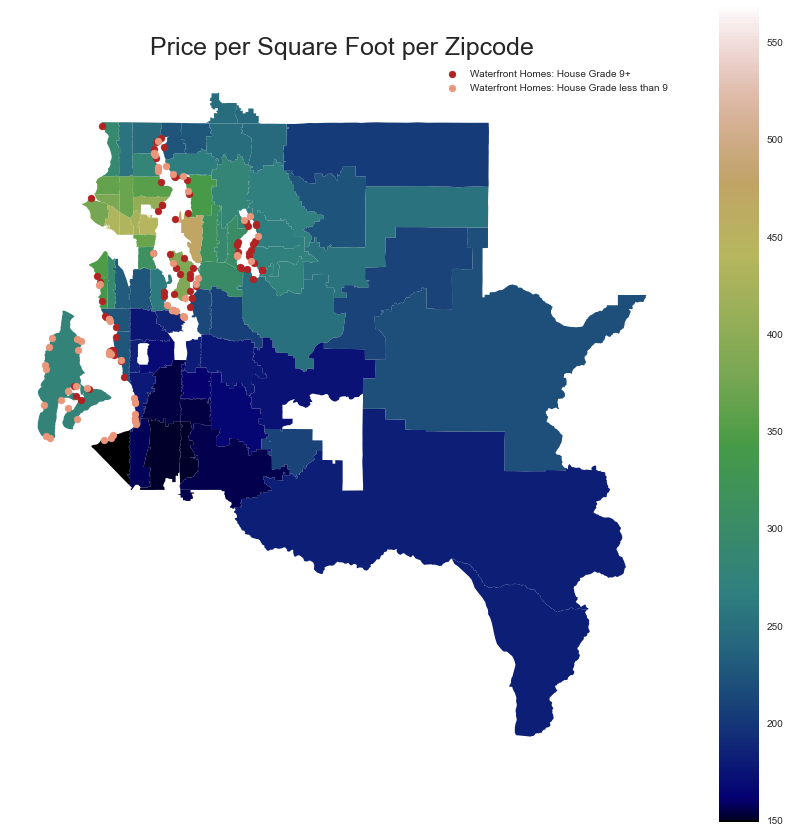

In [35]:
bc.map_waterfront(data)

Let's see how the patterns found in our analysis play out in our inferential model development.

## Data Prep (for Modeling)

Time to get some some dummies for our categorical variables:


(We did make sure to drop the first column for each variable to avoid that infamous *Dummy Variable Trap*.)

In [36]:
from src import modeling_data_prep as mdp

In [37]:
model_data = mdp.add_dummies(data)
model_data.head() # scroll to the right to see the dummy variables

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,price_per_sqft,zip_psqft,price_per_lot_sqft,yard_size,...,decb_1940_1950,decb_1950_1960,decb_1960_1970,decb_1970_1980,decb_1980_1990,decb_1990_2000,decb_2000_2010,decb_2010_2020,fortyyr_1940_1980,fortyyr_1980_2020
0,221900.0,1180,5650,1180,1340,5650,188.050847,189.172528,39.274336,4470.0,...,0,1,0,0,0,0,0,0,0,0
1,538000.0,2570,7242,2170,1690,7639,209.338521,282.680191,74.288870,4672.0,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,770,10000,770,2720,8062,233.766234,225.145368,18.000000,9230.0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,1050,1360,5000,308.163265,337.245108,120.800000,3040.0,...,0,0,1,0,0,0,0,0,0,0
4,510000.0,1680,8080,1680,1800,7503,303.571429,265.686627,63.118812,6400.0,...,0,0,0,0,1,0,0,0,0,0


Now that we have our `model_data`, we can start building our **first model**!

![skylinegraph](img/sklyinewithgraph.png)

## Model Iterations

In [38]:
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

###### For our model, we attempted to optimize the following features:
* minimizing p-values for each variable and condition number.
* maximizing F-statistic, Jarque-Bera probability, and R squared.

And, of course, making sure our model doesn't violate these assumptions:
* Normality
* Linearity
* Homoscedasticity

### Our *First Simple Model*

Since `sqft_living` has the **highest** correlation with price (0.702), let's build our first model around it!

In [39]:
formula = 'price ~ sqft_living'
fsm = ols(formula = formula, data = model_data).fit()
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:23:24   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

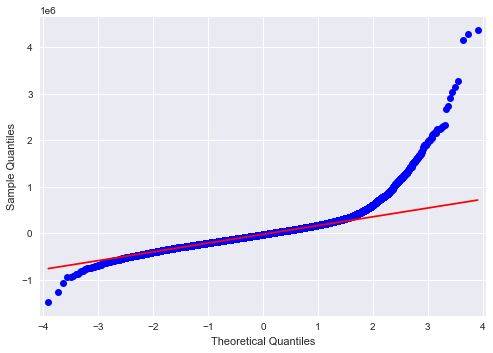

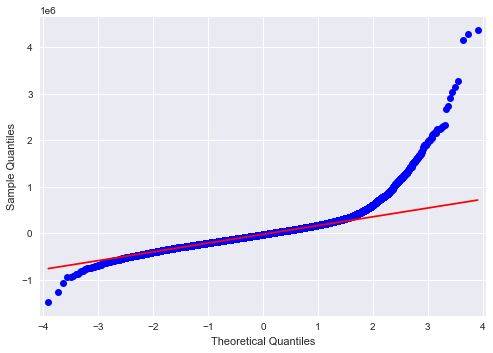

In [40]:
qqplot(fsm.resid, line='q')

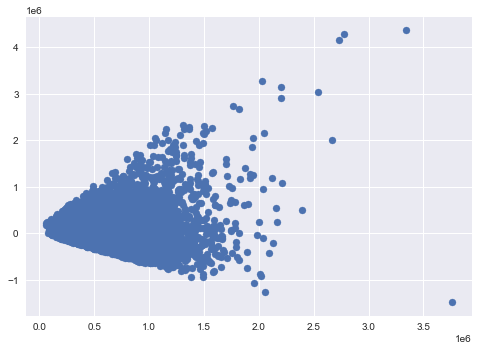

In [41]:
# Checking for homoscedasticity
x = fsm.predict(model_data['sqft_living'])
y = fsm.resid
plt.scatter(x, y)

#### First Simple Model Takeaways:

* low R-squared
* low p-value for `sqft_living`
* **HIGH** condition number (5630)
* QQ-plot - extreme **positive** deviation from the line in the 2nd through 4th quantiles
    * This confirms that our data is not normally distributed, which violates an assumption of linear regression.
    * Our data has a significant **right skew**
* The low Jarque-Bera probability (0.0) is additional confirmation for the lack of normality in error distribution.
* Our scatterplot shows **heteroscedasticity** with a right-facing, conical distribution of residuals.

### Model 2: Adding in all the variables

We wanted to see how the model will respond if we added all the variables in. We got as high an R-squared as **0.957**! This model below, however, is that model but only with variables with the lowest p-values.

NOTE: This model using all housing data with a condition greater than or equal to a Grade of 6, since we are only looking to see price trends in homes that are up to code.

In [42]:
highrsq_model, hrsqdata = mdp.highest_rsquared(model_data)

In [43]:
highrsq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.645e+04
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:23:25   Log-Likelihood:            -2.8237e+05
No. Observations:               21597   AIC:                         5.648e+05
Df Residuals:                   21584   BIC:                         5.649e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.868e+05   3744.870   -156.694      0.000   -5.94e+05   -5.79e+05
sqft_living          288.0371      1.474    195.352      0.000     285.147     290.927
price_per_sqft      1898.9039     12.238    155.163      0.000    1874.916    1922.892
wf_Y                3.546e+05   1.02e+04     34.871      0.000    3.35e+05    3.75e+05
zpsft500plus        3.628e+05   1.72e+04     21.127      0.000    3.29e+05    3.96e+05
price_per_lot_sqft    70.1237     10.429      6.724      0.000      49.683      90.565
grade_13            1.131e+06   3.27e+04     34.573      0.000    1.07e+06    1.19e+06
zpsft200_300       -3.555e+04   1896.243    -18.747      0.000   -3.93e+04   -3.18e+04
zpsft300_400       -5.838e+04   2809.353    -20.779      0.000   -6.39e+04   -5.29e+04
zip_psqft            272.5318     19.033     14.319      0.000     235.226     309.838
sqft_living15        -10.9852      1.926     -5.702      0.000     -14.761      -7.209
incity_Y           -1.457e+04   1998.036     -7.293      0.000   -1.85e+04   -1.07e+04
grade_12            3.719e+05   1.28e+04     29.105      0.000    3.47e+05    3.97e+05
==============================================================================
Omnibus:                    14169.098   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2656150.439
Skew:                           2.135   Prob(JB):                         0.00
Kurtosis:                      57.161   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since our condition number is so high, let's see who the multicollinearity culprits are:

In [68]:
bc.corr_table(hrsqdata.corr()).head()

,cc
pairs,
"(sqft_living15, sqft_living)",0.945010
"(zip_psqft, price_per_sqft)",0.911092
"(zpsft300_400, zpsft200_300)",0.843701
"(zpsft300_400, zip_psqft)",0.832724
"(incity_Y, sqft_living15)",0.816387


It's lookin' like we have **very** highly correlated pairs.

Let's see if our error distribution has changed:

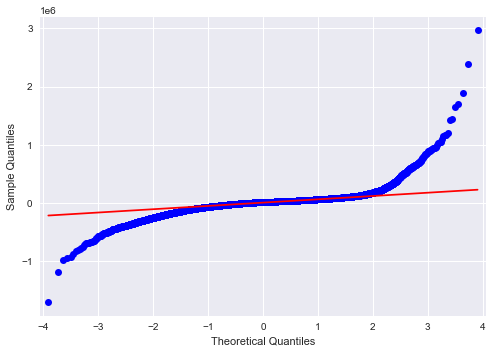

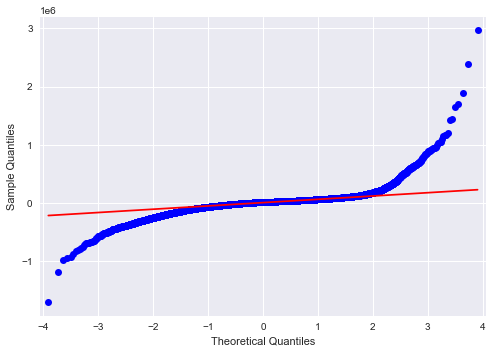

In [44]:
qqplot(highrsq_model.resid, line='q')

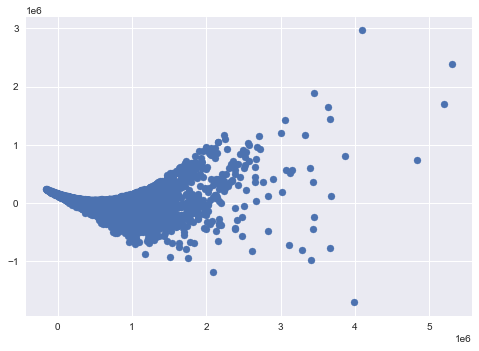

In [45]:
x = highrsq_model.predict(hrsqdata)
y = highrsq_model.resid
plt.scatter(x, y)

#### 2nd Model Takeaways:

* HIGH R-squared
* low p-values across the board
* Much **higher** condition number than FSM (129,000)
* QQ-plot - significant deviation from normal line in the 2nd through 4th quantiles AND -4 thru -2 quantiles 
    * This confirms that our data is still not normally distributed, which violates an assumption of linear regression.
* The low Jarque-Bera probability (0.0) is additional confirmation for the lack of normality in error distribution.
* Our scatterplot shows **heteroscedasticity** with a right-facing, almost exponential distribution of residuals.

### Model 3: Time to normalize

Upon examination of the results of our first two models, let's take a look at our variables and see how we should adjust them for our third model.

###### Distribution of `sqft_living`

In [46]:
continuous_vars = ['sqft_living', 'sqft_lot', 
                   'sqft_living15', 'sqft_lot15', 'yard_size']

array([[<AxesSubplot:title={'center':'sqft_living Distribution'}>,
        <AxesSubplot:title={'center':'sqft_lot Distribution'}>,
        <AxesSubplot:title={'center':'sqft_living15 Distribution'}>],
       [<AxesSubplot:title={'center':'sqft_lot15 Distribution'}>,
        <AxesSubplot:title={'center':'yard_size Distribution'}>,
        <AxesSubplot:>]], dtype=object)

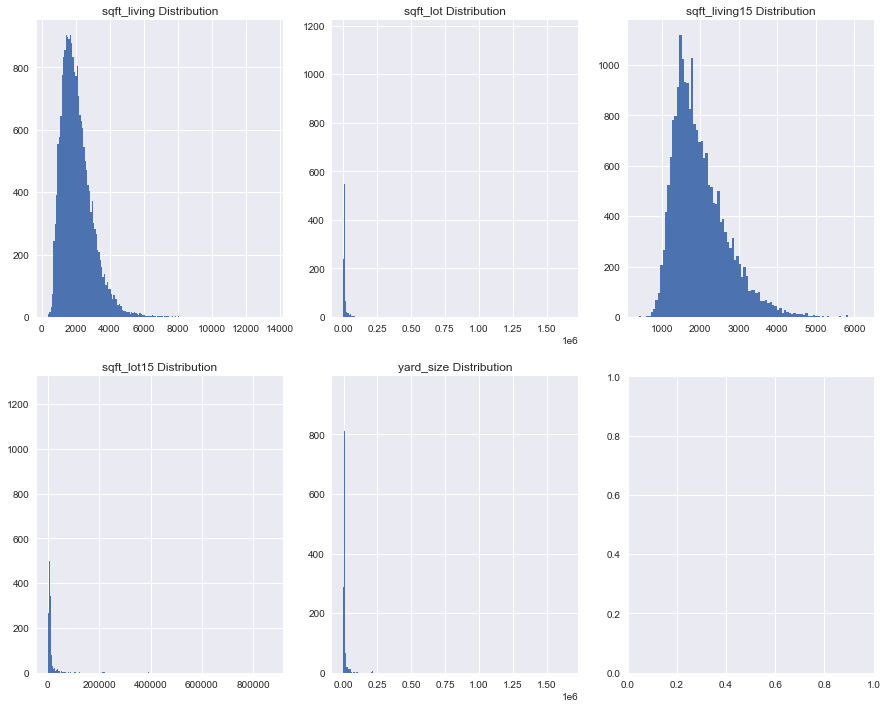

In [47]:
mdp.continuous_dists(model_data, continuous_vars)

Though it is a bit difficult to see in some of the graphs, each of these variables (including price) have a **positive skew**. Let's normalize all of these variables with a **log transform**:

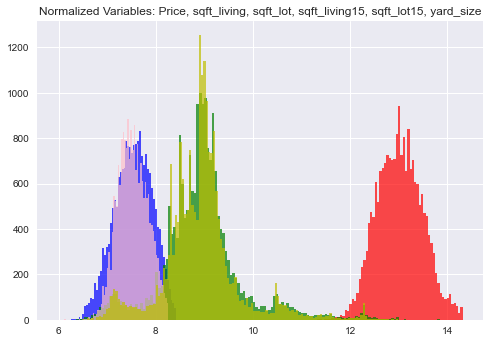

In [48]:
log_vars, plot = mdp.normalizing(model_data)

While we're at it, let's center the variables around zero using a **power transform**:

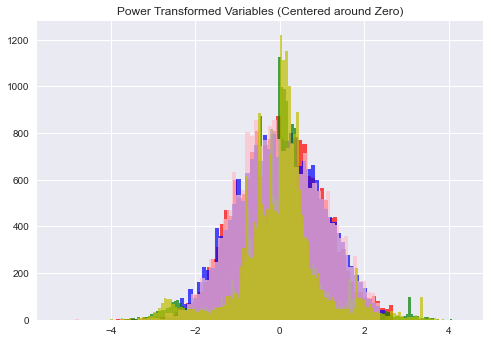

In [49]:
pwrd_vars, plot = mdp.power_transform(logged=log_vars)

Let's see what our model looks like now!

This model is one of the iterations of our **luxury homes model** subset (only using houses with a Grade of 10 or higher).

In [50]:
normmodel, norm_data = mdp.most_normal_luxury(data)

In [51]:
normmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:23:55   Log-Likelihood:                -1430.9
No. Observations:                1633   AIC:                             2890.
Df Residuals:                    1619   BIC:                             2965.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5890      0.060    -26.397      0.000      -1.707      -1.471
sqft_living15     0.1870      0.016     11.608      0.000       0.155       0.219
wf_Y              1.2630      0.081     15.682      0.000       1.105       1.421
grade_11          0.4872      0.036     13.602      0.000       0.417       0.557
grade_12          1.0009      0.068     14.767      0.000       0.868       1.134
grade_13          1.6594      0.166     10.020      0.000       1.335       1.984
se_spring         0.0789      0.041      1.934      0.053      -0.001       0.159
se_summer        -0.0082      0.040     -0.205      0.837      -0.087       0.070
se_winter         0.0374      0.048      0.784      0.433      -0.056       0.131
zpsft200_300      1.0646      0.056     19.003      0.000       0.955       1.175
zpsft300_400      1.8738      0.062     30.139      0.000       1.752       1.996
zpsft400_500      2.3727      0.067     35.244      0.000       2.241       2.505
zpsft500plus      2.6800      0.135     19.880      0.000       2.416       2.944
inc_Y            -0.0167      0.043     -0.393      0.694      -0.100       0.067
==============================================================================
Omnibus:                       85.519   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.201
Skew:                          -0.016   Prob(JB):                     5.92e-69
Kurtosis:                       5.149   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

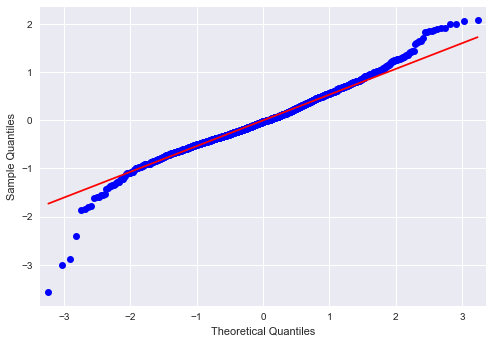

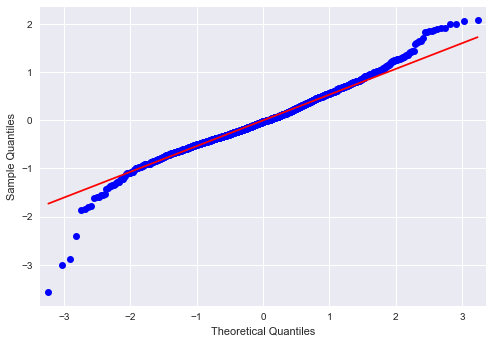

In [52]:
qqplot(normmodel.resid, line='q')

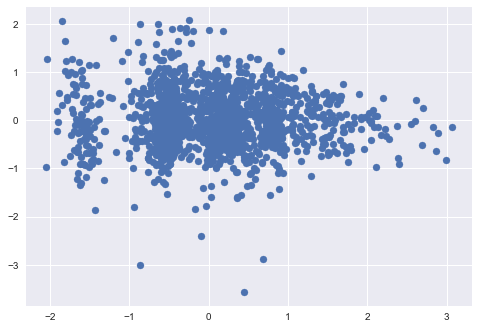

In [53]:
x = normmodel.predict(norm_data)
y = normmodel.resid
plt.scatter(x, y)

#### 3rd Model Takeaways:

* LOWER R-squared
* Some problematic p-values
* Much **LOWER** condition number than FSM and 2nd Model. (15.5)
* QQ-plot - least amount of deviation from the normal line
* Jarque-Bera probability is higher than the first two models, indicating progress towards normality.
* Our scatterplot is much more **homoscedastic** than the other two, although it does show a slight left-facing, conical shape of the residuals.

## FINAL MODELS

Drum roll, please...

### Model for *All Homes* (Grades 6+)

In [54]:
model, model_data = mdp.final_model_all_homes(data, powered=pwrd_vars)

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     7004.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:23:56   Log-Likelihood:                -12275.
No. Observations:               20392   AIC:                         2.458e+04
Df Residuals:                   20379   BIC:                         2.468e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1376      0.012    -91.935      0.000      -1.162      -1.113
sqft_living       0.3514      0.005     70.724      0.000       0.342       0.361
sqft_living15     0.1586      0.005     33.666      0.000       0.149       0.168
grade_7           0.1570      0.012     13.400      0.000       0.134       0.180
grade_8           0.3499      0.014     25.712      0.000       0.323       0.377
grade_9           0.6160      0.017     35.866      0.000       0.582       0.650
grade_10          0.8183      0.022     36.921      0.000       0.775       0.862
grade_11          0.9650      0.042     23.220      0.000       0.884       1.046
grade_12          0.9512      0.256      3.716      0.000       0.450       1.453
zpsft200_300      0.8713      0.008    113.734      0.000       0.856       0.886
zpsft300_400      1.5394      0.009    168.929      0.000       1.522       1.557
zpsft400_500      1.9248      0.015    126.942      0.000       1.895       1.955
zpsft500plus      2.5000      0.104     23.944      0.000       2.295       2.705
==============================================================================
Omnibus:                      976.959   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3559.417
Skew:                          -0.049   Prob(JB):                         0.00
Kurtosis:                       5.044   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

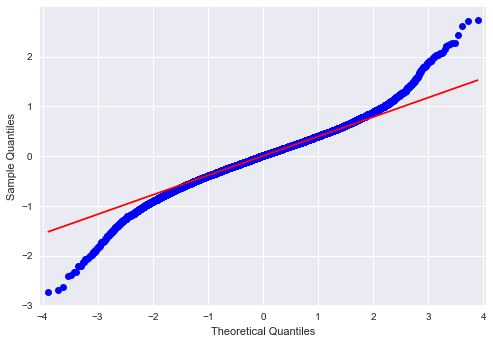

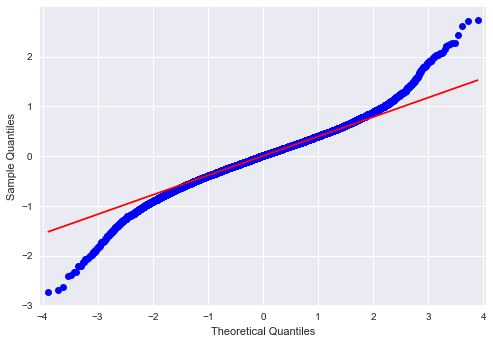

In [56]:
qqplot(model.resid, line='q')

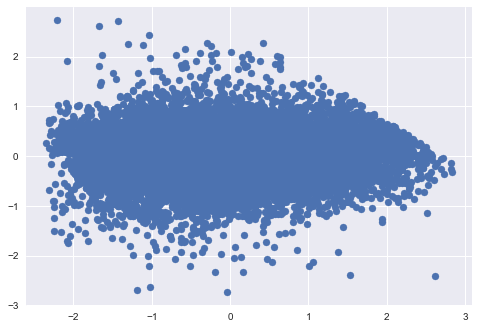

In [57]:
x = model.predict(model_data)
y = model.resid
plt.scatter(x, y)

#### Final Model - All Homes - Takeaways:

* HIGH R-squared
* NO high p-values.
* Much **LOWER** condition number than FSM and 2nd Model. (111)
* QQ-plot - Slight deviation on both ends, but not as much as the FSM or 2nd model.
* Our scatterplot is much more **homoscedastic** than the first three models, although it does show a very slight left-facing, conical shape of the residuals.

### Model for Non-Luxury Homes (Grades 6-9)

In [58]:
nonluxmodel, nonlux_data = mdp.final_model_non_lux(data)

In [59]:
nonluxmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     5514.
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:23:57   Log-Likelihood:                -11239.
No. Observations:               17032   AIC:                         2.250e+04
Df Residuals:                   17020   BIC:                         2.260e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1939      0.008   -140.640      0.000      -1.211      -1.177
sqft_living       0.3160      0.005     61.105      0.000       0.306       0.326
sqft_living15     0.1381      0.005     26.525      0.000       0.128       0.148
sqft_lot          0.0958      0.004     21.761      0.000       0.087       0.104
grade_8           0.2746      0.009     30.500      0.000       0.257       0.292
grade_9           0.5853      0.014     42.406      0.000       0.558       0.612
zpsft200_300      1.0052      0.009    113.874      0.000       0.988       1.023
zpsft300_400      1.7990      0.011    162.470      0.000       1.777       1.821
zpsft400_500      2.2486      0.019    121.445      0.000       2.212       2.285
zpsft500plus      2.9085      0.166     17.545      0.000       2.584       3.233
cond_4            0.0864      0.009     10.047      0.000       0.070       0.103
cond_5            0.2591      0.014     18.280      0.000       0.231       0.287
==============================================================================
Omnibus:                      666.221   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2081.021
Skew:                          -0.048   Prob(JB):                         0.00
Kurtosis:                       4.710   Cond. No.                         64.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

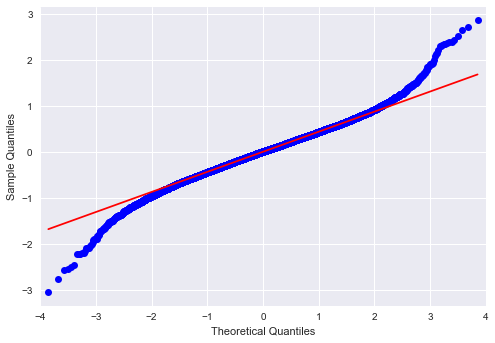

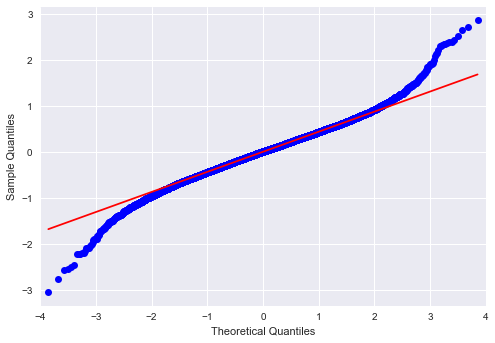

In [60]:
qqplot(nonluxmodel.resid, line='q')

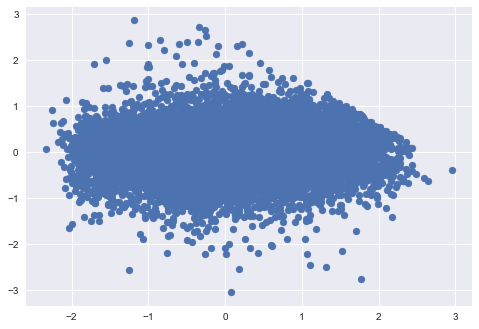

In [61]:
x = nonluxmodel.predict(nonlux_data)
y = nonluxmodel.resid
plt.scatter(x, y)

#### Final Model - Non Luxury Homes - Takeaways:

* HIGH R-squared
* NO high p-values.
* Much **LOWER** condition number than FSM and 2nd Model. (111)
* QQ-plot - Slight deviation on both ends, but not as much as the FSM or 2nd model.
* Our scatterplot is the same shape as the All Homes final model (not as heteroscadastic).

### Model for Luxury Homes (Grades 10+)

In [62]:
luxmodel, lux_data = mdp.final_model_luxury(data)

In [63]:
luxmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     388.2
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:23:58   Log-Likelihood:                -1161.6
No. Observations:                1633   AIC:                             2351.
Df Residuals:                    1619   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5262      0.045    -33.622      0.000      -1.615      -1.437
sqft_living       0.3751      0.016     24.196      0.000       0.345       0.406
sqft_living15     0.0547      0.015      3.737      0.000       0.026       0.083
wf_Y              1.1101      0.069     16.165      0.000       0.975       1.245
cond_4            0.0855      0.036      2.355      0.019       0.014       0.157
cond_5            0.3987      0.063      6.318      0.000       0.275       0.523
grade_11          0.2690      0.032      8.388      0.000       0.206       0.332
grade_12          0.5619      0.061      9.267      0.000       0.443       0.681
grade_13          0.8330      0.145      5.752      0.000       0.549       1.117
zpsft200_300      1.1576      0.048     24.261      0.000       1.064       1.251
zpsft300_400      1.8402      0.053     34.702      0.000       1.736       1.944
zpsft400_500      2.2912      0.058     39.665      0.000       2.178       2.405
zpsft500plus      2.5381      0.114     22.187      0.000       2.314       2.763
inc_Y            -0.0853      0.036     -2.358      0.019      -0.156      -0.014
==============================================================================
Omnibus:                      123.883   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.976
Skew:                           0.004   Prob(JB):                    1.61e-142
Kurtosis:                       6.098   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

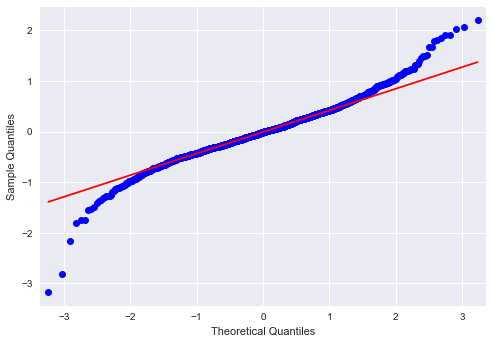

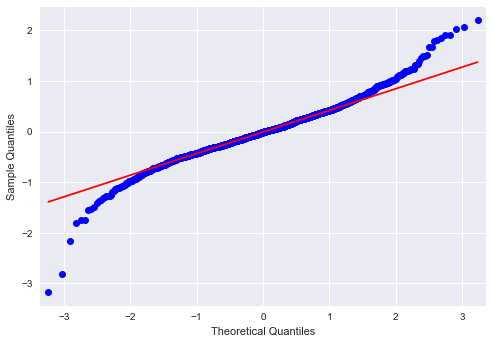

In [64]:
qqplot(luxmodel.resid, line='q')

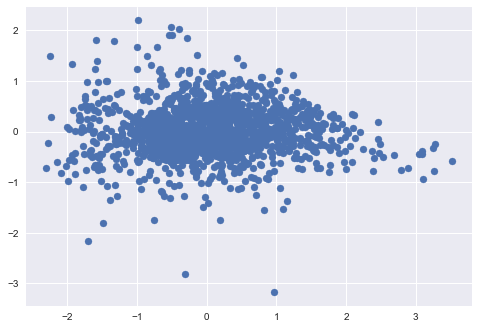

In [65]:
x = luxmodel.predict(lux_data)
y = luxmodel.resid
plt.scatter(x, y)

#### Final Model - LUXURY Homes - Takeaways:

* HIGH R-squared
* NO high p-values.
* Much **LOWER** condition number than FSM and 2nd Model. (15.2)
* QQ-plot - Slight deviation on both ends, but not as much as the FSM or 2nd model.
* Our scatterplot is much more **homoscedastic** than the first three models, although it does show a very slight left-facing, conical shape of the residuals.

## Conclusions

##### So, what can we conclude from these final three models?

1. For all King County homes in general, the **size, grade, location, and size of neighboring houses** have a strong *positive* correlation with house prices.


2. For all **Non-luxury** King County homes (Grades 6-9) have a significant *positive* correlation with **house size, grade, location, size of neighboring houses, and house condition** *(Top 3 in terms of coefficient value: Location, Grade, House Size)*


3. For all **Luxury** King County homes (Grades 10+) have a significant *positive* correlation with **house size, grade, location, size of neighboring houses, house condition,** and whether or not the house has a **waterfront view**. There is also a substantial **negative** correlation with whether or not the house is part of an **incorporated** area. *(Top 3 positive coefficients: Location, Waterfront, Condition)*

## Next Steps

* Looking at it's respective graph, **House Grade** seems to have an **exponential** relationship with price. In the future, we could accomodate our model for such non-linear relationships.


* Using more current housing data. (See *Considering COVID* in Appendix of our presentation pdf)


* Develop a function that will automatically take in the dataset and optimize the model to maximize/minimize MULTIPLE specified features (F-stat, Jarque Bera, p-value, etc).


* See if the model can be improved by any of the following factors:

    * *Zipcode's Average Education Levels (i.e Avg SAT score, or the like)*
    * *Zipcode's median income*
    * *Zipcode's crime rate*
    * *A given house's proximity to the nearest store (and other necessities)*

## Sources

* [How Data Science is transforming real estate](https://www.realestate.bnpparibas.com/how-data-science-transforming-real-estate)
* [5 Ways to Apply Data Science to Real Estate](https://towardsdatascience.com/5-ways-to-apply-data-science-to-real-estate-e18cdcd0c1a6)
* [Here's what the 2021 housing market will look like in Seattle](https://www.seattlepi.com/realestate/article/seattle-2021-housing-market-projection-15825083.php)


* King County Map: (incorporated areas are colored)
    * Here's a nice [article](https://www.starnewsonline.com/article/NC/20151017/news/605047421/WM) about the difference between incorporated and unincorporated areas.



![KCmap](img/KingCountyMap.png)